<a href="https://colab.research.google.com/github/Shreya-Asthana/Stock-Market-Analysis-data-analytics-/blob/main/stockMarketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the yfinance (Yahoo Finance) library

In [ ]:
!pip install yfinance

# Fetch the Data

We are comapring the stock market trends of Google, Microsoft and Amazon

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers
tickers = ["GOOGL", "MSFT", "AMZN"]

# Download data for the past 4 years
data = yf.download(tickers, start="2020-01-01", end="2024-12-01")

# Keep only the closing prices
close_prices = data['Close']
print(close_prices.head())
len(data)


[*********************100%***********************]  3 of 3 completed


Ticker           AMZN      GOOGL        MSFT
Date                                        
2020-01-02  94.900497  68.433998  160.619995
2020-01-03  93.748497  68.075996  158.619995
2020-01-06  95.143997  69.890503  159.029999
2020-01-07  95.343002  69.755501  157.580002
2020-01-08  94.598503  70.251999  160.089996


1237

# identifying outliers using modified z-score

In [ ]:
from scipy.stats import median_abs_deviation

# Calculate MAD and median
mad = close_prices.apply(median_abs_deviation, axis=0)
median = close_prices.median()

# Compute Modified Z-scores
mod_z_scores = 0.6745 * (close_prices - median) / mad

# Identify outliers
outliers_mod_z = mod_z_scores[(mod_z_scores > 3.5) | (mod_z_scores < -3.5)]

print("Outliers detected using Modified Z-Score:\n", outliers_mod_z.dropna())


Outliers detected using Modified Z-Score:
 Empty DataFrame
Columns: [AMZN, GOOGL, MSFT]
Index: []


# remove the outliers (if any)

In [ ]:
# Mask for non-outlier data
non_outliers = (mod_z_scores <= 3.5) & (mod_z_scores >= -3.5)

# Filter out the outliers
data = close_prices[non_outliers]
print("Cleaned Data:\n", data)


Cleaned Data:
 Ticker            AMZN       GOOGL        MSFT
Date                                          
2020-01-02   94.900497   68.433998  160.619995
2020-01-03   93.748497   68.075996  158.619995
2020-01-06   95.143997   69.890503  159.029999
2020-01-07   95.343002   69.755501  157.580002
2020-01-08   94.598503   70.251999  160.089996
...                ...         ...         ...
2024-11-22  197.119995  164.759995  417.000000
2024-11-25  201.449997  167.649994  418.790009
2024-11-26  207.860001  169.119995  427.989990
2024-11-27  205.740005  169.229996  422.989990
2024-11-29  207.889999  168.949997  423.459991

[1237 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

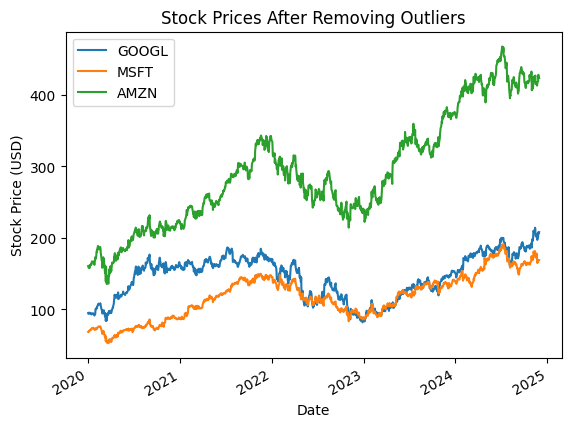

In [ ]:
import matplotlib.pyplot as plt

# Plot the cleaned data
plt.figure(figsize=(12, 6))
data.plot(title="Stock Prices After Removing Outliers")
plt.ylabel("Stock Price (USD)")
plt.xlabel("Date")
plt.legend(["GOOGL", "MSFT", "AMZN"])
plt.show()


# Data Overview

In [ ]:
# Summary statistics
print("Summary Statistics of Cleaned Data:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Cleaned Data:")
print(data.isnull().sum())


Summary Statistics of Cleaned Data:
Ticker         AMZN        GOOGL         MSFT
count   1237.000000  1237.000000  1237.000000
mean     145.400044   117.926279   291.875295
std       30.622102    31.472771    78.556309
min       81.820000    52.706501   135.419998
25%      120.511002    93.050003   234.529999
50%      153.380005   119.058998   281.779999
75%      169.149994   139.867996   337.309998
max      214.100006   191.179993   467.559998

Missing Values in Cleaned Data:
Ticker
AMZN     0
GOOGL    0
MSFT     0
dtype: int64


# Plot Stock Price Trends

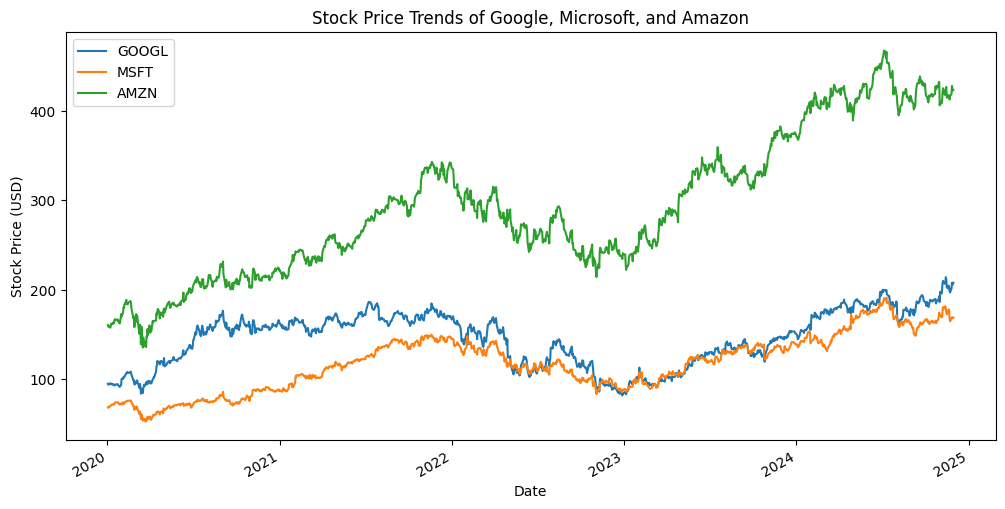

In [ ]:
# Plot closing prices of the three stocks
close_prices.plot(figsize=(12, 6), title="Stock Price Trends of Google, Microsoft, and Amazon")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend(tickers)
plt.show()


# Normalize Data for Trend Comparison

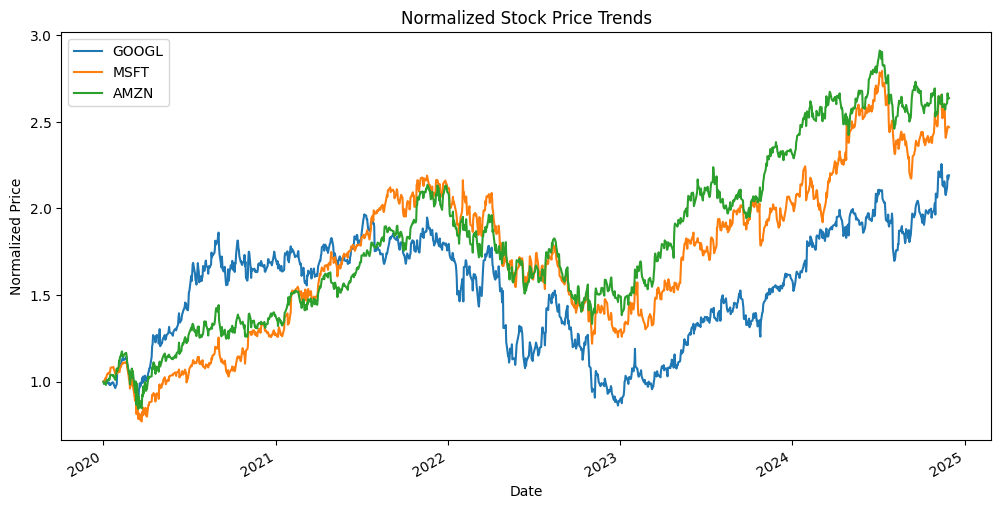

In [ ]:
# Normalize closing prices
normalized_prices = close_prices / close_prices.iloc[0]

# Plot normalized prices
normalized_prices.plot(figsize=(12, 6), title="Normalized Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend(tickers)
plt.show()


# Compute Basic Statistics

In [ ]:
# Calculate daily returns
daily_returns = close_prices.pct_change()

# Calculate summary statistics
summary_stats = daily_returns.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
 Ticker         AMZN        GOOGL         MSFT
count   1236.000000  1236.000000  1236.000000
mean       0.000893     0.000940     0.000971
std        0.022738     0.020434     0.019314
min       -0.140494    -0.116341    -0.147390
25%       -0.011293    -0.009504    -0.008481
50%        0.000789     0.001843     0.000971
75%        0.012917     0.011310     0.010947
max        0.135359     0.102244     0.142169


# Correlation Analysis

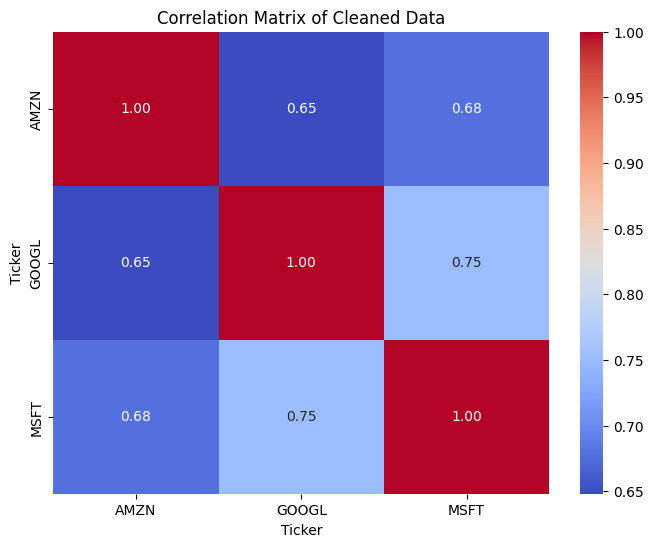

In [ ]:
# Correlation matrix of daily returns
correlation_matrix = daily_returns.corr()

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Cleaned Data")
plt.show()


# Rolling Mean and Volatility

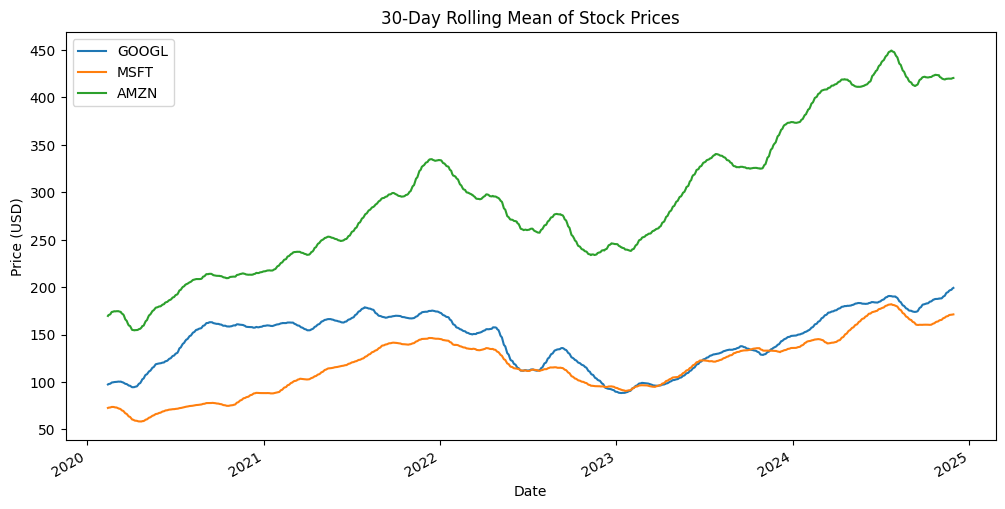

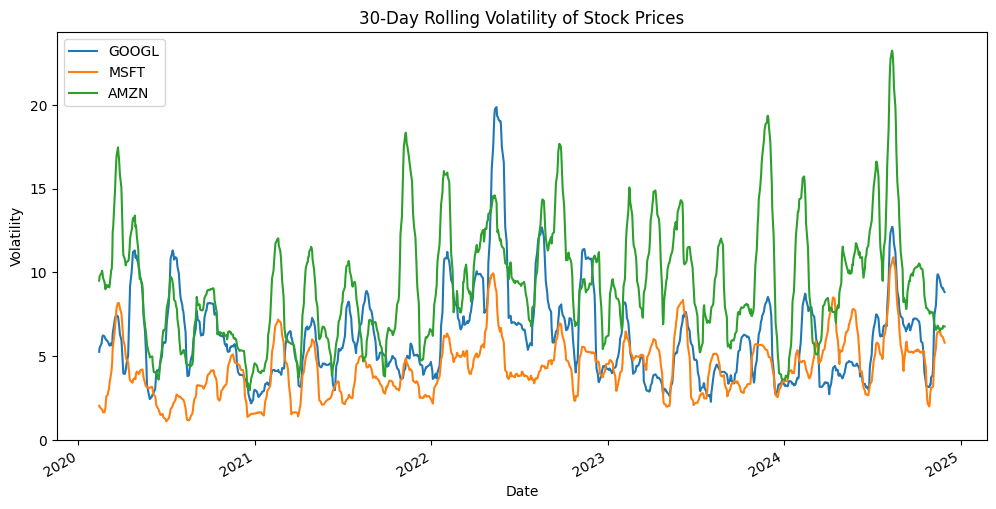

In [ ]:
# Calculate 30-day rolling mean
rolling_mean = close_prices.rolling(window=30).mean()

# Calculate 30-day rolling volatility
rolling_volatility = close_prices.rolling(window=30).std()

# Plot rolling mean
rolling_mean.plot(figsize=(12, 6), title="30-Day Rolling Mean of Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(tickers)
plt.show()

# Plot rolling volatility
rolling_volatility.plot(figsize=(12, 6), title="30-Day Rolling Volatility of Stock Prices")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend(tickers)
plt.show()


 From the plot of the 30-Day Rolling Volatility, all three companies (Google, Microsoft, and Amazon) show considerable fluctuations in their stock prices, indicating that they are volatile.

# Moving Averages and Crossovers

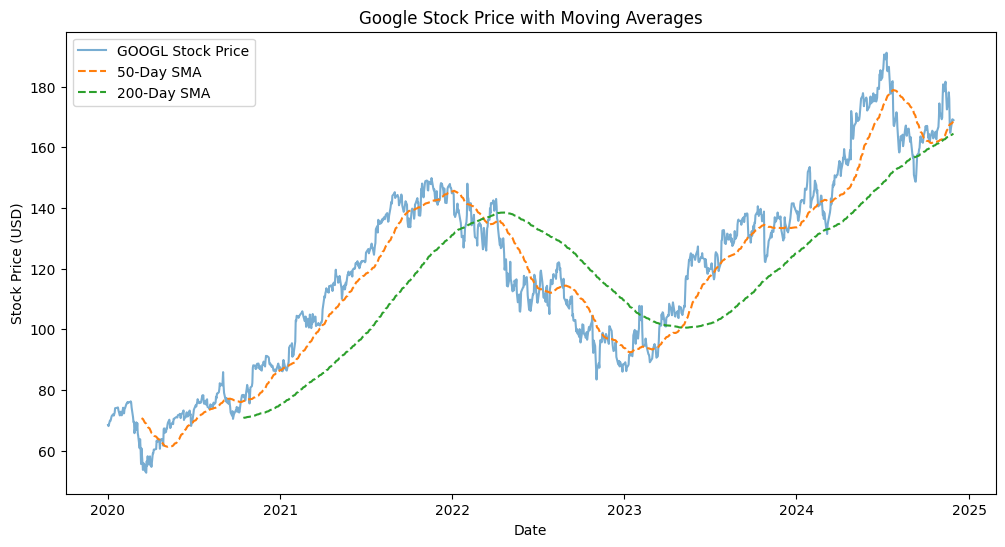

In [ ]:
# Calculate 50-day and 200-day SMAs
data['GOOGL_50_SMA'] = data['GOOGL'].rolling(window=50).mean()
data['GOOGL_200_SMA'] = data['GOOGL'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['GOOGL'], label="GOOGL Stock Price", alpha=0.6)
plt.plot(data['GOOGL_50_SMA'], label="50-Day SMA", linestyle="--")
plt.plot(data['GOOGL_200_SMA'], label="200-Day SMA", linestyle="--")
plt.title("Google Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


in early 2023 ,we can see a golden cross (occurs when the short-term moving average (e.g., 50-day SMA) crosses above the long-term moving average (e.g., 200-day SMA)). it signifies Bullish signal, Indicates a potential upward trend in the stock price or market. Often seen as a sign of increasing buying momentum and long-term strength.

around early 2022, there's a death cross (occurs when the short-term moving average crosses below the long-term moving average.). It signifies Bearish signal, Indicates a potential downward trend in the stock price or market. Seen as a sign of weakening momentum and potential long-term decline. Here we can see that the decline continued to the early 2023 due to economic slowdowns during COVID-19 and changes in the market dynamic, and this can be one of the reasons of mass layoffs by google, announced in january, 2023 for cost cutting

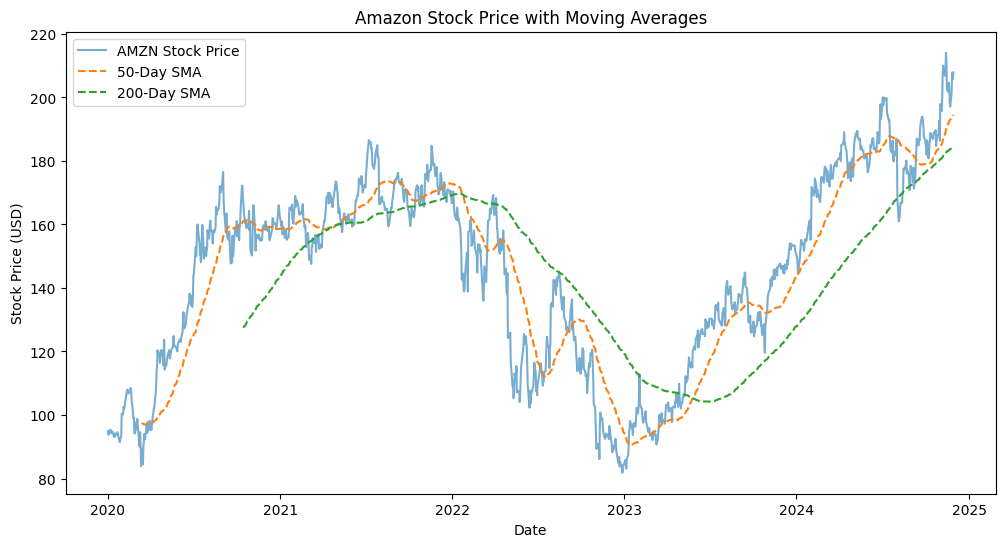

In [ ]:
# Calculate 50-day and 200-day SMAs
data['AMZN_50_SMA'] = data['AMZN'].rolling(window=50).mean()
data['AMZN_200_SMA'] = data['AMZN'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['AMZN'], label="AMZN Stock Price", alpha=0.6)
plt.plot(data['AMZN_50_SMA'], label="50-Day SMA", linestyle="--")
plt.plot(data['AMZN_200_SMA'], label="200-Day SMA", linestyle="--")
plt.title("Amazon Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


golden cross in mid 2023, possible reason can be, in 2023, the economy and many sectors, including tech, were experiencing a recovery from the effects of the pandemic, which could have driven stock prices higher.

death cross in starting of 2022, it can be because early 2022 was still affected by COVID-19 concerns, including its economic aftermath. There was a period of market instability, especially in the tech sector. Also Central banks, including the Federal Reserve, were beginning to raise interest rates to combat inflation, which negatively impacted growth stocks like Amazon.

Interesting, we have seen the similar trend in Google's stock price.

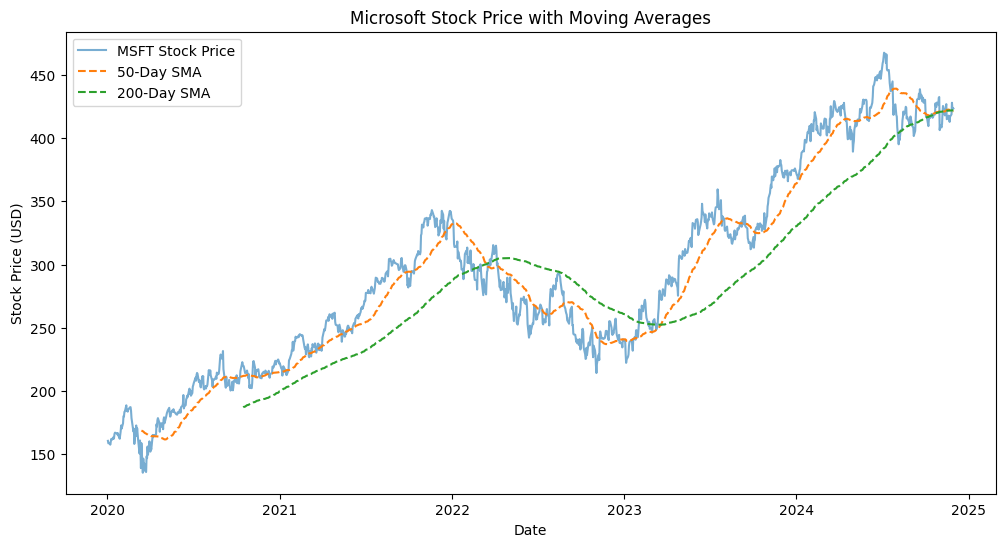

In [ ]:
# Calculate 50-day and 200-day SMAs
data['MSFT_50_SMA'] = data['MSFT'].rolling(window=50).mean()
data['MSFT_200_SMA'] = data['MSFT'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['MSFT'], label="MSFT Stock Price", alpha=0.6)
plt.plot(data['MSFT_50_SMA'], label="50-Day SMA", linestyle="--")
plt.plot(data['MSFT_200_SMA'], label="200-Day SMA", linestyle="--")
plt.title("Microsoft Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

here also, the death cross is around early 2022 and the golden cross is around early 2023.
we can say, that the COVID-19 can be a major reason for this market trend

The similar timing of Golden Cross and Death Cross periods for Microsoft (MSFT), Amazon (AMZN), and Google (GOOGL)

This indicates a shift toward bullish momentum during early 2023, likely driven by:
- Post-pandemic recovery in technology sectors.
- Improved market sentiment as companies adapted to economic changes.
- Reduction in inflationary fears or improved earnings reports for these tech giants.

A Death Cross in early 2022 for all three companies indicates a bearish trend, which aligns with broader economic challenges such as:
- Inflation concerns and interest rate hikes by central banks.
- The aftermath of pandemic disruptions affecting operations and supply chains.
- Tech layoffs and decreasing demand in certain tech sectors.
Notably, companies like Microsoft also announced mass layoffs in 2022, further contributing to a decline in investor confidence.

# Daily and Monthly Returns

[*********************100%***********************]  3 of 3 completed
<ipython-input-23-6fb880fcb7a1>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = data.resample('M').last()  # Take the last price of each month


<Figure size 1200x600 with 0 Axes>

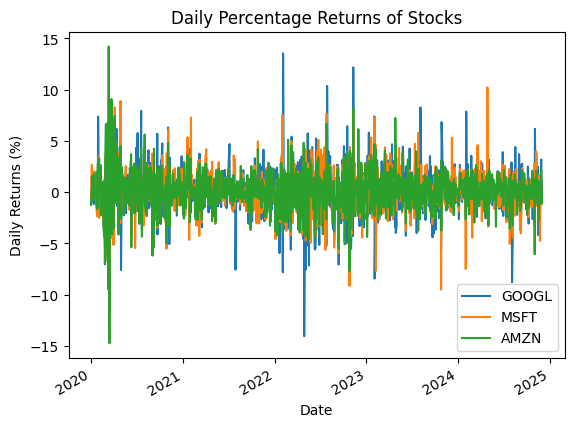

<Figure size 1200x600 with 0 Axes>

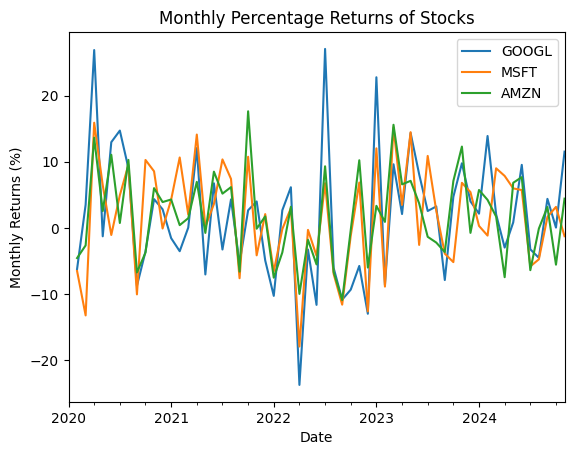

Daily Returns Summary:
Ticker         AMZN        GOOGL         MSFT
count   1236.000000  1236.000000  1236.000000
mean       0.089284     0.094232     0.100708
std        2.273774     2.043304     1.930833
min      -14.049438   -11.634153   -14.739008
25%       -1.129311    -0.950411    -0.846652
50%        0.078929     0.184272     0.111289
75%        1.291661     1.131005     1.096946
max       13.535902    10.224366    14.216856

Monthly Returns Summary:
Ticker       AMZN      GOOGL       MSFT
count   58.000000  58.000000  58.000000
mean     1.702152   1.794229   1.866242
std      9.595042   7.795170   6.525803
min    -23.752509 -17.946687 -10.926705
25%     -4.827708  -4.089705  -3.411744
50%      2.118388   2.340794   1.722439
75%      6.587556   7.264789   6.472140
max     27.059597  15.899990  17.629085


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers and fetch data
tickers = ["GOOGL", "MSFT", "AMZN"]
data = yf.download(tickers, start="2020-01-01", end="2024-12-01")["Adj Close"]

# Calculate daily returns
daily_returns = data.pct_change() * 100  # Multiply by 100 to convert to percentages

# Calculate monthly returns
monthly_prices = data.resample('M').last()  # Take the last price of each month
monthly_returns = monthly_prices.pct_change() * 100

# Plot daily returns
plt.figure(figsize=(12, 6))
daily_returns.plot(title="Daily Percentage Returns of Stocks")
plt.ylabel("Daily Returns (%)")
plt.xlabel("Date")
plt.legend(tickers)
plt.show()

# Plot monthly returns
plt.figure(figsize=(12, 6))
monthly_returns.plot(title="Monthly Percentage Returns of Stocks")
plt.ylabel("Monthly Returns (%)")
plt.xlabel("Date")
plt.legend(tickers)
plt.show()

# Display summary statistics for returns
print("Daily Returns Summary:")
print(daily_returns.describe())
print("\nMonthly Returns Summary:")
print(monthly_returns.describe())


Risk vs. Return Tradeoff:

- Amazon offers higher volatility (risk) but not necessarily higher average returns compared to Google and Microsoft.
- Microsoft appears to be the most stable, with the lowest daily and monthly volatility and the highest average returns over both timeframes.

Consistency:
- GOOGLE has more consistent returns compared to Amazon but is slightly more volatile than Microsoft. Its median monthly return (2.34%) is also slightly higher than AMZN.

Best Performer:
- Based on the mean daily and monthly returns, Microsoft is the best performer, with the highest returns and lowest volatility, making it an attractive option for steady growth with less risk.
- Short-term traders might find AMZN more appealing due to its higher daily volatility, which offers opportunities for significant short-term gains (or losses).

# Market Cap Analysis

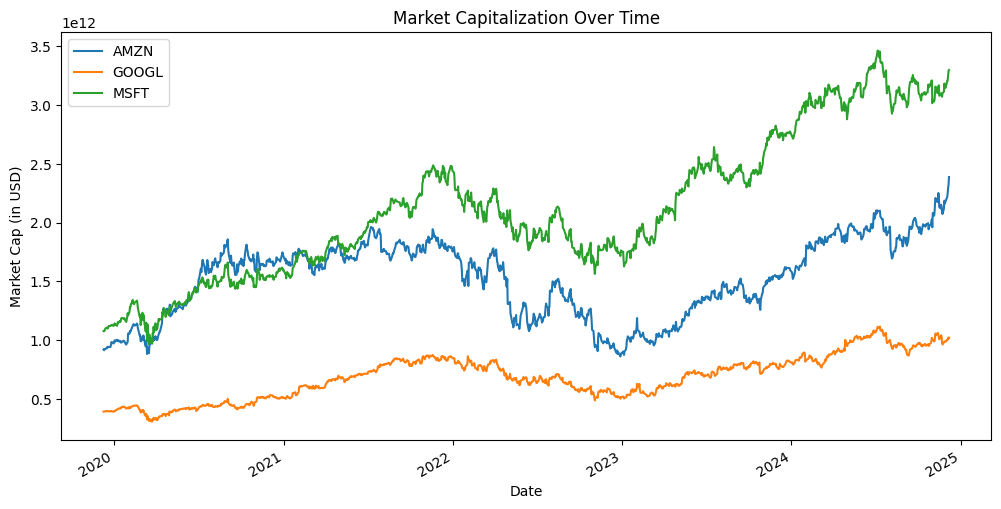

In [ ]:
import yfinance as yf
import pandas as pd

# Tickers for the companies
tickers = ['AMZN', 'GOOGL', 'MSFT']

# Create an empty DataFrame to store market cap data
market_cap_data = pd.DataFrame()

# Loop through each ticker
for ticker in tickers:
    stock = yf.Ticker(ticker)

    # Get historical stock prices
    stock_prices = stock.history(period='5y')['Close']

    # Get the number of shares outstanding using 'info'
    shares_outstanding = stock.info['sharesOutstanding']

    # Calculate market cap
    market_cap = stock_prices * shares_outstanding

    # Add to the DataFrame
    market_cap_data[ticker] = market_cap

# Plot market cap trends
market_cap_data.plot(figsize=(12, 6), title="Market Capitalization Over Time")
plt.xlabel("Date")
plt.ylabel("Market Cap (in USD)")
plt.legend(tickers)
plt.show()


Microsoft's market cap has surpassed both Amazon and Google by a significant margin, particularly after 2023. Amazon (blue line) and Google (orange line) are relatively closer in valuation compared to Microsoft.

# Predictive model
LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) designed to handle sequential data effectively.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt


In [ ]:

# Fetch data for multiple stocks
tickers = ['GOOGL', 'MSFT', 'AMZN']
data = {}

for ticker in tickers:
    data[ticker] = yf.download(ticker, start='2010-01-01', end='2024-12-1')

# Extract closing prices and combine into one DataFrame
combined_data = pd.concat([data[ticker]['Close'] for ticker in tickers], axis=1)
combined_data.columns = tickers  # Rename columns
combined_data.dropna(inplace=True)  # Drop rows with missing values

print(combined_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                GOOGL       MSFT    AMZN
Date                                    
2010-01-04  15.684434  30.950001  6.6950
2010-01-05  15.615365  30.959999  6.7345
2010-01-06  15.221722  30.770000  6.6125
2010-01-07  14.867367  30.450001  6.5000
2010-01-08  15.065566  30.660000  6.6760


In [ ]:

# Add moving averages, lag features, and returns
for ticker in tickers:
    combined_data[f'{ticker}_MA7'] = combined_data[ticker].rolling(window=7).mean()
    combined_data[f'{ticker}_Lag1'] = combined_data[ticker].shift(1)
    combined_data[f'{ticker}_Returns'] = combined_data[ticker].pct_change()

# Drop rows with NaN values
combined_data.dropna(inplace=True)



In [ ]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_data)

# Create sequences for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, :])
        # Binary target for direction (1 if price up, 0 if down)
        y.append(int(data[i + time_step, 0] > data[i + time_step - 1, 0]))
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]



In [ ]:
# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(LSTM(50)),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test))




Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.5015 - loss: 0.6981 - val_accuracy: 0.5271 - val_loss: 0.6955
Epoch 2/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.5354 - loss: 0.6923 - val_accuracy: 0.5271 - val_loss: 0.6921
Epoch 3/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.5287 - loss: 0.6920 - val_accuracy: 0.5271 - val_loss: 0.6986
Epoch 4/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.5102 - loss: 0.6911 - val_accuracy: 0.5271 - val_loss: 0.7013
Epoch 5/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.5186 - loss: 0.6954 - val_accuracy: 0.5271 - val_loss: 0.7002
Epoch 6/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.5379 - loss: 0.6918 - val_accuracy: 0.5271 - val_loss: 0.6923
Epoch 7/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.5478 - loss: 0.6912 - val_accuracy: 0.5271 - val_loss: 0.6912
Epoch 8/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.5006 - loss: 0.6924 - val_accuracy: 0.5271 - v

In [ ]:
# Predict the test set
predicted = (model.predict(X_test) > 0.5).astype(int).flatten()

# Directional Accuracy
directional_accuracy = np.mean(predicted == y_test) * 100
print(f"Directional Accuracy: {directional_accuracy:.2f}%")



24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step
Directional Accuracy: 52.71%


# Earlier model

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


[*********************100%***********************]  1 of 1 completed


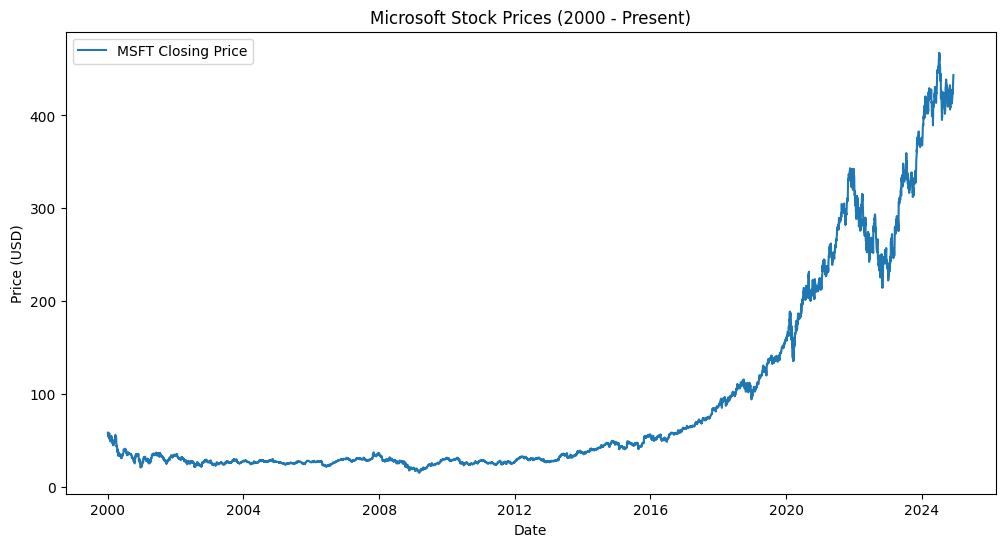

In [ ]:
# Download Microsoft stock data
ticker = 'MSFT'
msft_data = yf.download(ticker, start="2000-01-01")

# Extract the 'Close' price
data = msft_data[['Close']]
data.reset_index(inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='MSFT Closing Price')
plt.title('Microsoft Stock Prices (2000 - Present)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

# Prepare training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for the LSTM model
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

sequence_length = 60
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

# Reshape data for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 2.6694e-04
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 23s 82ms/step - loss: 1.4038e-05
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - loss: 1.2459e-05
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - loss: 1.7225e-05
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - loss: 1.2488e-05
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - loss: 1.2524e-05
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - loss: 1.0305e-05
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - loss: 1.1069e-05
Epoch 9/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - loss: 1.1165e-05
Epoch 10/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - loss: 1.1175e-05
Epoch 11/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - loss: 1.0204e-05
Epoch 12/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - loss: 1.0765e-05
Epoch 13/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - loss: 8.7744e-06
Epoch 14/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - l

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


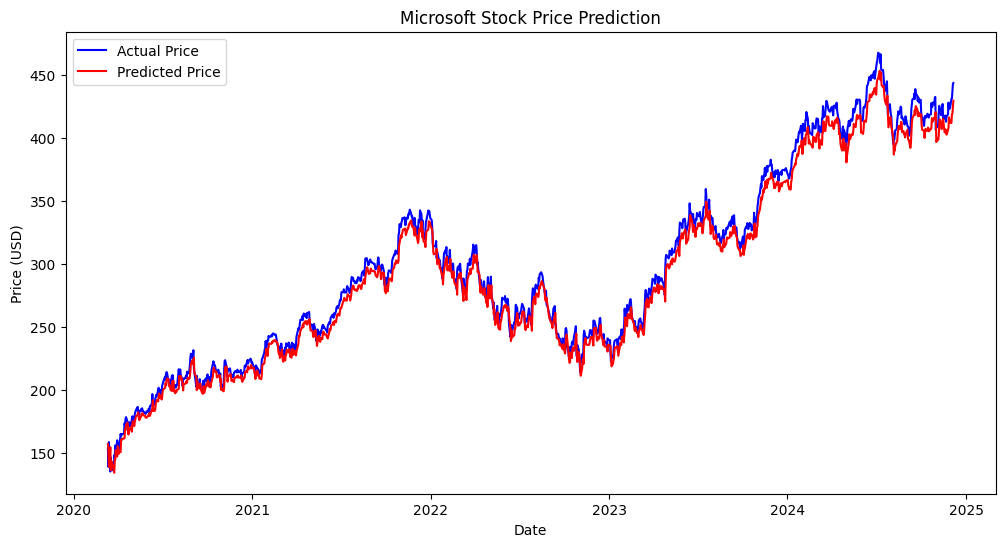

In [ ]:
# Predict on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the test set for comparison
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, label='Actual Price', color='blue')
plt.plot(data['Date'][-len(predictions):], predictions, label='Predicted Price', color='red')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_actual, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")


Root Mean Squared Error (RMSE): 8.97
Mean Absolute Percentage Error (MAPE): 2.55%


In [ ]:
# Calculate directional accuracy
actual_direction = np.sign(y_test_actual[1:] - y_test_actual[:-1])  # Actual direction
predicted_direction = np.sign(predictions[1:] - predictions[:-1])  # Predicted direction

directional_accuracy = np.mean(actual_direction == predicted_direction) * 100
print(f"Directional Accuracy: {directional_accuracy:.2f}%")


Directional Accuracy: 49.33%
